<a href="https://colab.research.google.com/github/eternaldemon/AI-Median-TIET/blob/master/Linear%20Regression%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data (1).csv


{'Car_Purchasing_Data.csv': b'Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount\r\nMartina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.8517198,62812.09301,11609.38091,238961.2505,35321.45877\r\nHarlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062335,66646.89292,9572.957136,530973.9078,45115.52566\r\nNaomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15289747,53798.55112,11160.35506,638467.1773,42925.70921\r\nJade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27136945,79370.03798,14426.16485,548599.0524,67422.36313\r\nCedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31374945,59729.1513,5358.712177,560304.0671,55915.46248\r\nCarla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489312,68499.85162,14179.47244,428485.3604,56611.99784\r\nGriffin Rivera,vehicula@at.co.uk,Syria,1,46.60731485,39814.522,5958.460188,326373.1812,28925.70549\r\nOrli Casey

In [ ]:
from collections import Counter

In [ ]:
data = pd.read_csv('Car_Purchasing_Data (1).csv',encoding='latin1')
data.head()
dataset = data

In [ ]:
data.shape

(500, 9)

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [ ]:
data1 = x.select_dtypes(include=['object'])
data2 = x.select_dtypes(exclude=['object'])

In [ ]:
data1.head()

,Customer Name,Customer e-mail,Country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data1.loc[:,:] = data1.loc[:,:].apply(label.fit_transform)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data1.head()

,Customer Name,Customer e-mail,Country
0,288,139,27
1,168,224,17
2,311,498,1
3,204,307,41
4,70,241,26


In [ ]:
# Finding Unique Labels in Categorical Features
# Important since OneHotEncoding will increase the number of features to more than 1000. 
# That is ridiculous
for col in data1.columns:
  print(col,':', len(data1[col].unique()), 'labels')

Customer Name : 498 labels
Customer e-mail : 500 labels
Country : 211 labels


In [ ]:
# Very Important if column name have spaces in its name
data1.columns = ['col1','col2','col3']

In [ ]:
# Get top 20 labels in any one of the columns first

data1.col2.value_counts().sort_values(ascending=False).head(20).index

NameError: ignored

In [ ]:
# Get top 10 labels for each categorical column
# Use .index to get labels not values

top10= [x for x in data1.col1.value_counts().sort_values(ascending=False).head(10).index]


How to get dummies for only top 10 labels occuring for a single categorical column
```
for label in top10:
  data1[label] = np.where(label== data1['col1'],1,0)

data1[['col1']+top10].head(50)
```



In [ ]:
data1.head()

In [ ]:
def onehotmax(data,column):
  column = str(column)
  print(column," has been one hot encoded for top 10 labels")
  top10 = [x for x in data[column].value_counts().sort_values(ascending=False).head(10).index]
  i = 0
  for label in top10:
    data[column+'_'+str(label)] = np.where(data[column]==label,1,0)


In [ ]:
onehotmax(data1,'col1')

col1  has been one hot encoded for top 10 labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data1.head()


,col1,col2,col3,col1_411,col1_475,col1_11,col1_29,col1_60,col1_28,col1_1,col1_2,col1_3,col1_4
0,288,139,27,0,0,0,0,0,0,0,0,0,0
1,168,224,17,0,0,0,0,0,0,0,0,0,0
2,311,498,1,0,0,0,0,0,0,0,0,0,0
3,204,307,41,0,0,0,0,0,0,0,0,0,0
4,70,241,26,0,0,0,0,0,0,0,0,0,0


In [ ]:
onehotmax(data1,'col2')
onehotmax(data1,'col3')

col2  has been one hot encoded for top 10 labels
col3  has been one hot encoded for top 10 labels


In [ ]:
data1.shape

(500, 33)

In [ ]:
cols_to_drop=['col1','col2','col3']
data1 = data1.drop(cols_to_drop,axis=1)

In [ ]:
data1.shape

(500, 30)

In [ ]:

#hot = OneHotEncoder()
#data1 = hot.fit_transform(data1).toarray()

In [ ]:
data1 = pd.DataFrame(data1)
print(data1.shape)
data2 = pd.DataFrame(data2)
print(data2.shape)

(500, 30)
(500, 5)


In [ ]:
frames = [data1, data2]
datanew = pd.concat(frames,axis=1)

In [ ]:
datanew.shape 
x = datanew

In [ ]:
x.shape

(500, 35)

In [ ]:
y=pd.DataFrame(y)
y.shape

(500, 1)

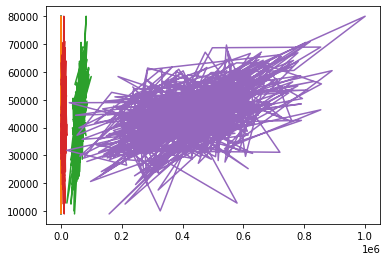

In [ ]:
plt.plot(x,y,)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: ignored

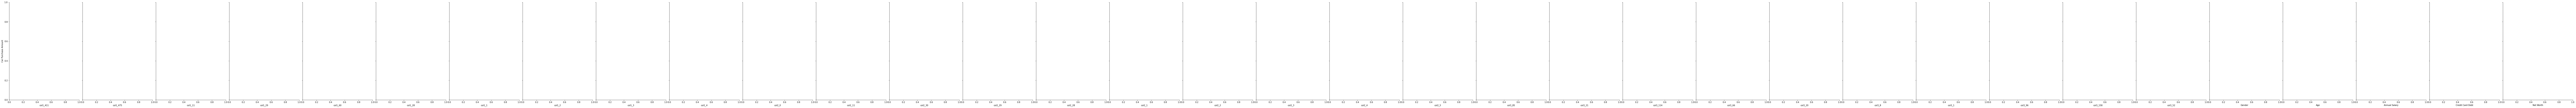

In [ ]:
import seaborn as sns
sns.pairplot(data, x_vars=x.columns, y_vars=y.columns, size=7, aspect=0.7)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.tree import  DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.svm import SVR
model3 = SVR()
model3.fit(x_train,y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
model.score(x_train,y_train)

0.9999999820193426

In [ ]:
model2.score(x_train,y_train)

1.0

In [ ]:
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.0020182576770173544
-0.0012046147268294227


In [ ]:
from sklearn import metrics

In [ ]:
predicted = model.predict(x_test)

In [ ]:
predicted = pd.DataFrame(predicted)

In [ ]:
predicted2 = pd.DataFrame(model2.predict(x_test))

In [ ]:
predicted3 = pd.DataFrame(model3.predict(x_test))

No handles with labels found to put in legend.


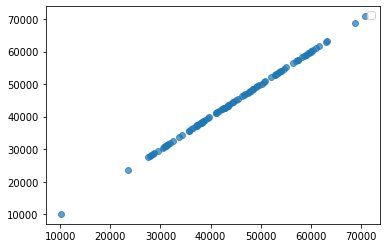

In [ ]:

plt.scatter(predicted,y_test,cmap='3d',alpha=0.7)
plt.legend()
plt.show()

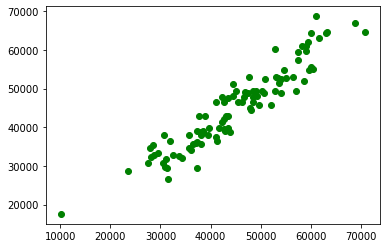

In [ ]:
plt.scatter(y_test,predicted2,cmap='3d',c='green')

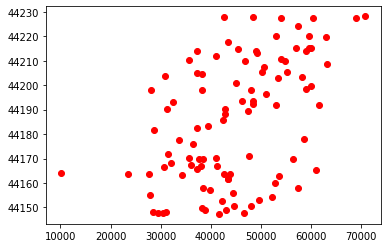

In [ ]:
plt.scatter(y_test,predicted3,cmap='3d',color='red')

In [ ]:
#Multiple Regression
abs = metrics.mean_absolute_error(y_test,predicted)
rmse = metrics.mean_squared_error(y_test,predicted)
print(abs)
print(rmse)


1.2325016045168014
2.4902642458647635


In [ ]:
#Decision Tree Regressor
abs2 = metrics.mean_absolute_error(y_test,predicted2)
rmse2 = metrics.mean_squared_error(y_test,predicted2)
print(abs2)
print(rmse2)

2862.8254196000016
13069121.524163518


In [ ]:
#Support Vector Regressor
abs3 = metrics.mean_absolute_error(y_test,predicted3)
rmse3 = metrics.mean_squared_error(y_test,predicted3)
print(abs3)
print(rmse3)

8923.694606113399
120588502.68375081


# Best Model according to the metrics and scatter plots is Model no 1 i.e. **Multiple** **Regression**